In [5]:
import numpy as np 

## Part one : Forward:

In [57]:
def forward(  x # N*D
            , W1 #M*D
            , W2 #1*M 
            ):
    # M is number of neurons in hidden layer
    # also used after training for evaluation
    a = np.matmul(x , np.transpose(W1)) # size = ND * (MD)^T = ND * DM = N*M
    z = np.tanh(a) # size = N*M
    y_pred = np.matmul(z , np.transpose(W2)) # N*M * 1*M^T
    return y_pred, z


In [58]:
N = 100
D = 10 
M = 200
x = np.random.normal(loc = 1 , scale = 2 , size=(N , D))
# N = 100 , D = 10
W1 = np.random.normal(loc = 1 , scale = 2, size = (M , D))
W2 = np.random.normal(loc = 1, scale = 2 , size = (1 , M))

y_pred , z = forward(x , W1 , W2)

print("y shape is:" , y_pred.shape ,"hidden shape is:", z.shape,"input shape is:"  , x.shape)

y shape is: (100, 1) hidden shape is: (100, 200) input shape is: (100, 10)


## Part2: backward

In [59]:

def backward(X , N , D , y , M , iter , lr):
    np.random.seed(43)
    W1 = np.random.uniform(low = 0 , high= 0.1 , size = (M , D))
    W2 = np.random.uniform(low= 0 , high = 0.1 , size = (1 , M))
    error_over_time= []
    for _ in range(iter):
        running_loss = 0 
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(N):
            data = X_shuffled[i , :]
            true_label = y_shuffled[i]
            pred_label , z_pred = forward(data , W1 , W2)
            running_loss+= 0.5*(true_label - pred_label)**2
            delta_out = true_label - pred_label
            delta_hidden = (np.ones(shape=(M,1))-z_pred**2).T@np.transpose(W2)*delta_out
            W2 = W2 + lr*(delta_out*z_pred)
            W1 = W1 + lr*(delta_hidden@data.reshape(1,D))
        error_over_time.append(running_loss[0]/N)

    return error_over_time  , W1 , W2


In [60]:
error_over_time , W1 , W2 = backward(x , N , D , y_pred , M , 1000 , 0.0001)

In [23]:
import matplotlib.pyplot as plt

In [61]:
error_over_time

[1758.0325315893062,
 320.0435961919937,
 177.41394170758383,
 113.76569872685891,
 87.5306722455064,
 71.82273843135583,
 60.61824997048004,
 51.300411029615915,
 49.14366636216548,
 40.28789765721803,
 35.471037088740076,
 32.63795974920451,
 29.79569004456001,
 29.1586516452817,
 27.185943208550462,
 26.271821922958633,
 24.963755036633156,
 24.430559157643028,
 23.3218667962464,
 23.099219446814697,
 22.613934012975104,
 21.648634960348755,
 21.257699436655912,
 20.692151396142908,
 20.33440691186441,
 19.86381323151157,
 19.509892003000946,
 19.181206029796,
 18.97317905877445,
 18.68348586538074,
 18.465918838884182,
 18.112704407223912,
 17.79611797036559,
 17.515012181953878,
 17.324652298995925,
 16.81960949124427,
 16.06464668225118,
 15.960672063801672,
 15.515960342409478,
 15.714315330844096,
 15.144237875954829,
 14.92703283970022,
 14.71267260794365,
 14.419068026736156,
 14.269641867074638,
 14.073631954410157,
 13.859656904275376,
 13.7548517268468,
 13.62172675828607,

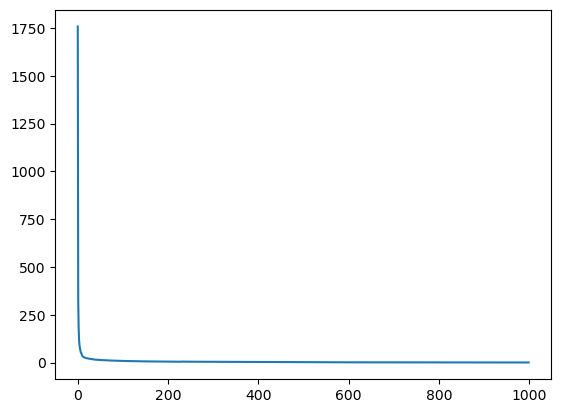

In [62]:
plt.plot(error_over_time)

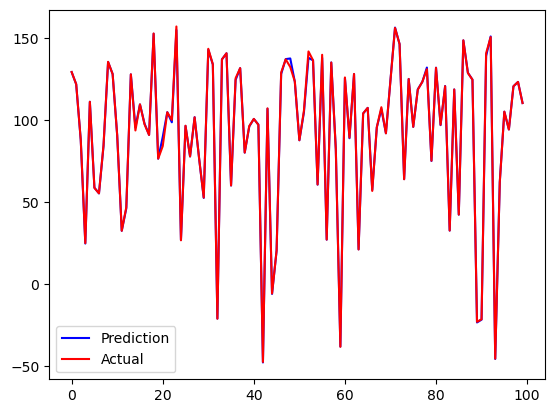

In [63]:
y_pred_1, _ = forward(x  , W1 , W2 )
plt.plot(y_pred_1 , color = 'b', label = "Prediction")
plt.plot(y_pred,  color = 'r' , label = "Actual")
plt.legend()
plt.show()

## Importing Data 

In [64]:
import pandas as pd

In [87]:
file_name = "winequality-red.csv"
df = pd.read_csv(file_name)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [88]:

df_shuffle = df.sample(frac=1 , random_state=44).reset_index(drop = True)
df_train , df_test = df_shuffle.iloc[0:int(np.ceil(len(df)/2))+1 , :] ,  df_shuffle.iloc[int(np.ceil(len(df)/2))+1:, :]

In [89]:
# Finding mean and variance of X_train 
u_train= df_train.mean()
sigma_train = df_train.std()
u_train , sigma_train

(fixed acidity            8.289014
 volatile acidity         0.536011
 citric acid              0.266679
 residual sugar           2.493883
 chlorides                0.088446
 free sulfur dioxide     16.465044
 total sulfur dioxide    47.666667
 density                  0.996746
 pH                       3.310911
 sulphates                0.661511
 alcohol                 10.390637
 quality                  5.609238
 dtype: float64,
 fixed acidity            1.722289
 volatile acidity         0.177994
 citric acid              0.196848
 residual sugar           1.309320
 chlorides                0.053662
 free sulfur dioxide     10.772536
 total sulfur dioxide    33.325703
 density                  0.001855
 pH                       0.159963
 sulphates                0.172783
 alcohol                  1.047144
 quality                  0.806762
 dtype: float64)

In [90]:
df_train_normal = (df_train - df_train.mean())/df_train.std()
df_test_normal = (df_test - df_train.mean())/df_train.std()

In [91]:
df_test_normal.insert(0, 'new_column', 1)
df_test_normal.reset_index(drop=True)

,new_column,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,-0.400057,1.370766,-1.354745,-0.606332,-0.231930,1.534918,-0.080018,-0.337427,-0.005697,-0.240248,0.295435,0.484358
1,1,-0.283932,0.050500,-0.745138,0.004672,-0.381012,-0.507313,-0.380087,-0.402100,0.181846,-0.298124,1.154916,0.484358
2,1,0.354752,-0.764132,1.236084,0.081048,-0.679178,-0.321655,-0.620142,-0.941042,0.056817,1.380286,2.873877,1.723881
3,1,0.470877,0.584225,-0.186332,0.462925,0.122142,-0.321655,-0.290066,1.645877,-0.193240,-0.413876,-0.659543,-0.755165
4,1,-0.167808,-0.202317,0.626477,0.081048,-0.120118,-0.414484,-0.050011,0.945253,0.744474,-0.240248,0.295435,0.484358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1,-0.864555,1.342675,-1.354745,0.386550,0.252589,-0.785799,-0.740169,-0.132629,0.869503,-0.587505,0.295435,-0.755165
794,1,-1.212929,-0.988858,-0.135532,-0.224454,0.122142,0.235317,-0.170039,-1.156618,1.619674,-0.529629,1.250414,0.484358
795,1,-0.341995,0.190954,-0.287933,-0.759083,-0.362377,-1.157113,-1.160266,-1.167397,-0.943412,-0.703257,-0.564045,0.484358
796,1,0.006379,0.640406,-0.846740,0.310174,0.010330,0.049659,-0.230053,0.691951,-0.130726,-0.645381,-0.850539,-0.755165


In [92]:
df_train_normal.insert(0, 'new_column', 1)
df_train_normal.reset_index(drop=True)

,new_column,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,-0.632306,-0.033772,-0.643537,-0.300830,-0.455554,-0.135998,-0.560128,-1.894968,0.244360,-0.298124,1.632405,0.484358
1,1,0.122503,-2.000125,1.236084,-0.568144,-0.325106,2.648862,1.210277,-0.811696,0.119331,0.570019,1.345911,1.723881
2,1,-0.400057,1.117949,-1.253144,0.004672,-0.325106,-0.600141,-1.010231,-0.736244,1.244589,0.280638,1.250414,1.723881
3,1,0.528939,-0.595587,1.286884,-0.148079,-0.101482,-0.228827,-0.740169,0.460206,0.244360,-0.298124,0.868422,0.484358
4,1,0.412815,-0.033772,1.134483,-0.453581,1.538427,-0.971456,-0.680156,0.406312,-0.255754,-0.298124,-0.946037,0.484358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1,0.354752,0.415680,1.134483,-0.377205,3.383325,0.606631,1.870428,0.244630,-1.193469,2.074800,-1.041534,-0.755165
797,1,-0.109746,0.134773,0.067671,-0.606332,5.209587,-0.043169,0.250057,0.029053,-1.255983,3.579581,-1.041534,-0.755165
798,1,-0.632306,-0.988858,0.982081,-0.300830,-0.269200,0.699460,-0.110025,-0.757801,0.556931,1.090905,0.581929,1.723881
799,1,1.283749,-0.651769,1.998092,0.348362,0.513484,-0.414484,-0.560128,0.136841,-0.443297,0.512143,1.250414,1.723881


In [115]:
def backward(X , N , D , y , M , iter , lr, X_val , y_Val , V):
    np.random.seed(43)
    W1 = np.random.uniform(low = 0 , high= 0.1 , size = (M , D))
    W2 = np.random.uniform(low= 0 , high = 0.1 , size = (1 , M))
    error_over_time= []
    val_error_over_time = []
    for _ in range(iter):
        running_loss = 0 
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(N):
            data = X_shuffled[i , :]
            true_label = y_shuffled[i]
            pred_label , z_pred = forward(data , W1 , W2)
            running_loss+= 0.5*(true_label - pred_label)**2
            delta_out = true_label - pred_label
            delta_hidden = (np.ones(shape=(M,1))-z_pred**2).T@np.transpose(W2)*delta_out
            W2 = W2 + lr*(delta_out*z_pred)
            W1 = W1 + lr*(delta_hidden@data.reshape(1,D))
        error_over_time.append(running_loss[0]/N)
        val_running_loss = 0
        for j in range(V):
            data = X_val[j , :]
            true_label = y_Val[j]
            pred_label , z_pred = forward(data , W1 , W2)
            val_running_loss+= 0.5*(true_label - pred_label)**2
        val_error_over_time.append(val_running_loss[0]/V)
    
    return val_error_over_time,  error_over_time  , W1 , W2


## Training on WINE data 

In [116]:
N = 801
V = 798
D = 12 
M = 30 
I = 1000 
lr = 0.00005

val_error_over_time, error_over_time , W1 , W2 = backward(df_train_normal.iloc[:, :-1].to_numpy() , N , D ,  df_train_normal.iloc[:, -1].to_numpy() , M , 1000 , lr , 
                                     df_test_normal.iloc[:, :-1].to_numpy() , df_test_normal.iloc[:, -1].to_numpy() , V)


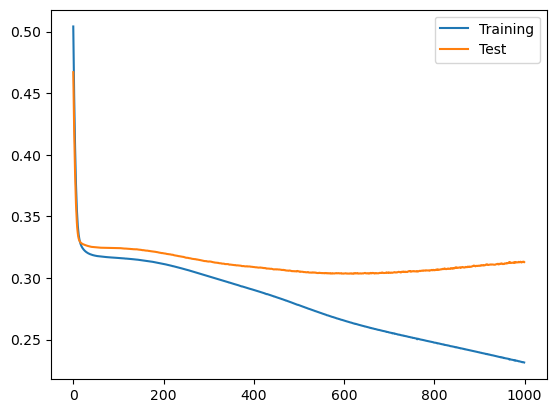

In [117]:
plt.plot(error_over_time , label = "Training")
plt.plot( val_error_over_time, label = "Test")
plt.legend()
plt.show()

In [96]:
y_pred  , _ =forward(df_train_normal.iloc[:, :-1].to_numpy() , W1  , W2)
y_true = df_train_normal.iloc[:, -1].to_numpy().reshape(-1, 1)

loss =(0.5*np.sum((y_true - y_pred)**2 / N))**0.5
print("Train RMSE" , loss)


y_pred  , _ =forward(df_test_normal.iloc[:, :-1].to_numpy() , W1  , W2)
y_true = df_test_normal.iloc[:, -1].to_numpy().reshape(-1, 1)

loss =(0.5*np.sum((y_true - y_pred)**2 / V))**0.5
print("Test RMSE" , loss)

Train RMSE 0.4793881661029644
Test RMSE 0.5593644728905821


## Changing Learning Rate:

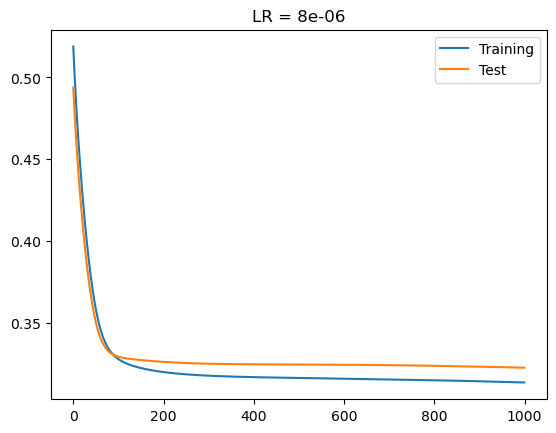

In [97]:
N = 801
V = 798
D = 12 
M = 30 
I = 1000 
lr = 0.000008

val_error_over_time, error_over_time , W1 , W2 = backward(df_train_normal.iloc[:, :-1].to_numpy() , N , D ,  df_train_normal.iloc[:, -1].to_numpy() , M , 1000 , lr , 
                                     df_test_normal.iloc[:, :-1].to_numpy() , df_test_normal.iloc[:, -1].to_numpy() , V)

plt.plot(error_over_time , label = "Training")
plt.plot( val_error_over_time, label = "Test")
plt.title(f"LR = {lr}")
plt.legend()
plt.show()

In [98]:
y_pred  , _ =forward(df_train_normal.iloc[:, :-1].to_numpy() , W1  , W2)
y_true = df_train_normal.iloc[:, -1].to_numpy().reshape(-1, 1)

loss =(0.5*np.sum((y_true - y_pred)**2 / N))**0.5
print("Train RMSE" , loss)


y_pred  , _ =forward(df_test_normal.iloc[:, :-1].to_numpy() , W1  , W2)
y_true = df_test_normal.iloc[:, -1].to_numpy().reshape(-1, 1)

loss =(0.5*np.sum((y_true - y_pred)**2 / V))**0.5
print("Test RMSE" , loss)

Train RMSE 0.5597138505096032
Test RMSE 0.5678336988368979


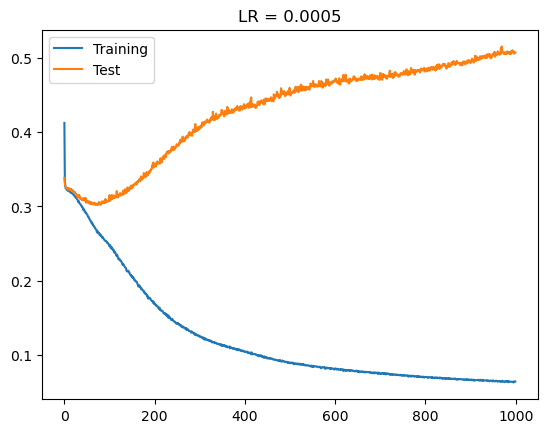

In [99]:
N = 801
V = 798
D = 12 
M = 30 
I = 1000 
lr = 0.0005

val_error_over_time, error_over_time , W1 , W2 = backward(df_train_normal.iloc[:, :-1].to_numpy() , N , D ,  df_train_normal.iloc[:, -1].to_numpy() , M , 1000 , lr , 
                                     df_test_normal.iloc[:, :-1].to_numpy() , df_test_normal.iloc[:, -1].to_numpy() , V)

plt.plot(error_over_time , label = "Training")
plt.plot( val_error_over_time, label = "Test")
plt.title(f"LR = {lr}")
plt.legend()
plt.show()

In [100]:
y_pred  , _ =forward(df_train_normal.iloc[:, :-1].to_numpy() , W1  , W2)
y_true = df_train_normal.iloc[:, -1].to_numpy().reshape(-1, 1)

loss =(0.5*np.sum((y_true - y_pred)**2 / N))**0.5
print("Train RMSE" , loss)


y_pred  , _ =forward(df_test_normal.iloc[:, :-1].to_numpy() , W1  , W2)
y_true = df_test_normal.iloc[:, -1].to_numpy().reshape(-1, 1)

loss =(0.5*np.sum((y_true - y_pred)**2 / V))**0.5
print("Test RMSE" , loss)

Train RMSE 0.24303726282389895
Test RMSE 0.7118698849284676


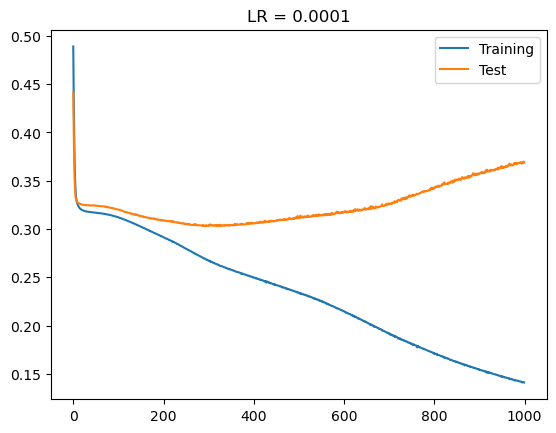

In [101]:
N = 801
V = 798
D = 12 
M = 30 
I = 1000 
lr = 0.0001

val_error_over_time, error_over_time , W1 , W2 = backward(df_train_normal.iloc[:, :-1].to_numpy() , N , D ,  df_train_normal.iloc[:, -1].to_numpy() , M , 1000 , lr , 
                                     df_test_normal.iloc[:, :-1].to_numpy() , df_test_normal.iloc[:, -1].to_numpy() , V)

plt.plot(error_over_time , label = "Training")
plt.plot( val_error_over_time, label = "Test")
plt.title(f"LR = {lr}")
plt.legend()
plt.show()

In [102]:
y_pred  , _ =forward(df_train_normal.iloc[:, :-1].to_numpy() , W1  , W2)
y_true = df_train_normal.iloc[:, -1].to_numpy().reshape(-1, 1)

loss =(0.5*np.sum((y_true - y_pred)**2 / N))**0.5
print("Train RMSE" , loss)


y_pred  , _ =forward(df_test_normal.iloc[:, :-1].to_numpy() , W1  , W2)
y_true = df_test_normal.iloc[:, -1].to_numpy().reshape(-1, 1)

loss =(0.5*np.sum((y_true - y_pred)**2 / V))**0.5
print("Test RMSE" , loss)

Train RMSE 0.371501713439034
Test RMSE 0.6072216331217093


## Adding more neurons

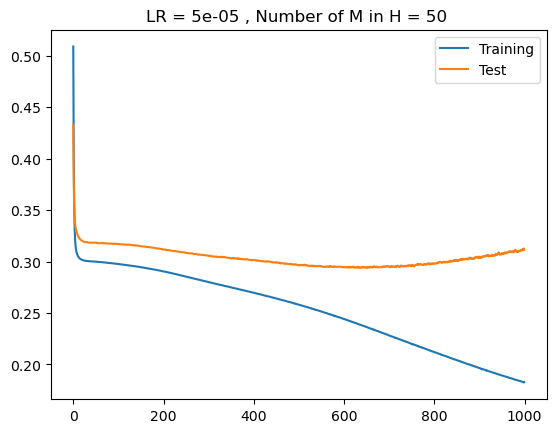

In [81]:
N = 801
V = 798
D = 12 
M = 50
I = 1000 
lr = 0.00005

val_error_over_time, error_over_time , W1 , W2 = backward(df_train_normal.iloc[:, :-1].to_numpy() , N , D ,  df_train_normal.iloc[:, -1].to_numpy() , M , 1000 , lr , 
                                     df_test_normal.iloc[:, :-1].to_numpy() , df_test_normal.iloc[:, -1].to_numpy() , V)

plt.plot(error_over_time , label = "Training")
plt.plot( val_error_over_time, label = "Test")
plt.title(f"LR = {lr} , Number of M in H = {M} ")
plt.legend()
plt.show()

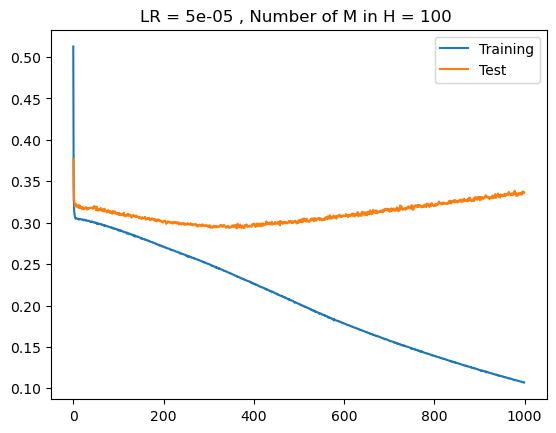

In [82]:
N = 801
V = 798
D = 12 
M = 100
I = 1000 
lr = 0.00005

val_error_over_time, error_over_time , W1 , W2 = backward(df_train_normal.iloc[:, :-1].to_numpy() , N , D ,  df_train_normal.iloc[:, -1].to_numpy() , M , 1000 , lr , 
                                     df_test_normal.iloc[:, :-1].to_numpy() , df_test_normal.iloc[:, -1].to_numpy() , V)

plt.plot(error_over_time , label = "Training")
plt.plot( val_error_over_time, label = "Test")
plt.title(f"LR = {lr} , Number of M in H = {M} ")
plt.legend()
plt.show()

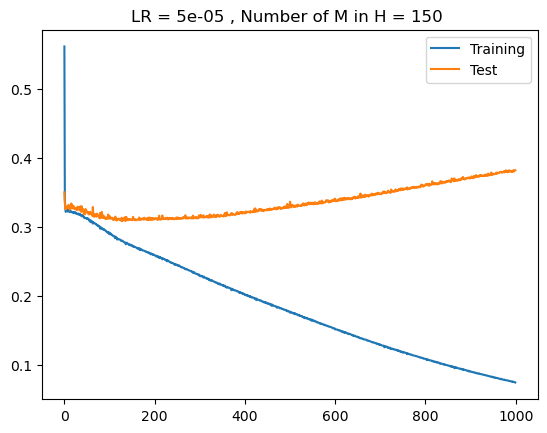

In [103]:
N = 801
V = 798
D = 12 
M = 150
I = 1000 
lr = 0.00005

val_error_over_time, error_over_time , W1 , W2 = backward(df_train_normal.iloc[:, :-1].to_numpy() , N , D ,  df_train_normal.iloc[:, -1].to_numpy() , M , 1000 , lr , 
                                     df_test_normal.iloc[:, :-1].to_numpy() , df_test_normal.iloc[:, -1].to_numpy() , V)

plt.plot(error_over_time , label = "Training")
plt.plot( val_error_over_time, label = "Test")
plt.title(f"LR = {lr} , Number of M in H = {M} ")
plt.legend()
plt.show()